Install the packages required



In [1]:
!pip install pydot --quiet
#!pip install tensorflow --quiet
!pip install transformers --quiet
!pip install sentencepiece --quiet
!pip install nltk --quiet
!pip install torch --quiet
#%run '266_data_cleaning.ipynb'

In [2]:
# standard
import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras

#from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
#from tensorflow.keras.models import Model
#import tensorflow.keras.backend as K
#import tensorflow_datasets as tfds

import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
import os
import nltk
from nltk.data import find

import matplotlib.pyplot as plt

import re
import string
import seaborn as sns
import os
import textwrap


import copy
#from tqdm.notebook import tqdm
from tqdm import tqdm
import gc

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report
)

import transformers
from transformers import (
    T5Tokenizer, 
    T5Model,
    T5ForConditionalGeneration,
    get_linear_schedule_with_warmup
)

#from transformers import T5Tokenizer, TFT5Model, TFT5ForConditionalGeneration
#from transformers import GPT2Tokenizer, TFOPTForCausalLM

/Users/swarna/miniforge3/envs/w207_final/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#df_train = pd.read_csv("https://adamhyman-public.s3.amazonaws.com/train_data.csv")
df_train = pd.read_csv("../data/sample_train_data.csv")

#df_valid = pd.read_csv("https://adamhyman-public.s3.amazonaws.com/validation_data.csv")
df_valid = pd.read_csv("../data/sample_validation_data.csv")

#df_test = pd.read_csv("https://adamhyman-public.s3.amazonaws.com/test_data.csv")
df_test = pd.read_csv("../data/sample_test_data.csv")

In [4]:
#There are 3 null comments in train dataset, 1 in valid and 1 in test. They need to be removed or we get error while convertin gto tensor
df_train = df_train.dropna(how='any',axis=0) 
df_valid = df_valid.dropna(how='any',axis=0) 
df_test = df_test.dropna(how='any',axis=0) 

In [5]:
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
#    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"\#/@;:{}`+=~|!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub("(\W)"," ",text) 
   # text = re.sub('S*dS*s*','', text)
    return text
df_train["text"] = df_train['comment_text'].apply(lambda text: clean_text(text))
df_valid["text"] = df_valid['comment_text'].apply(lambda text: clean_text(text))
df_test["text"] = df_test['comment_text'].apply(lambda text: clean_text(text))

In [6]:
train_comments, train_labels = df_train["comment_text"], df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
valid_comments, valid_labels = df_valid["comment_text"], df_valid[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
test_comments, test_labels = df_test["comment_text"], df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
#train_comments, train_labels = tf.convert_to_tensor(train_comments), tf.convert_to_tensor(train_labels)
#valid_comments, valid_labels = tf.convert_to_tensor(valid_comments), tf.convert_to_tensor(valid_labels)
#test_comments, test_labels = tf.convert_to_tensor(test_comments), tf.convert_to_tensor(test_labels)

In [7]:
def get_labels(df):
    labels_li = [' '.join(x.lower().split()) for x in df.columns.to_list()[:6]]
    labels_matrix = np.array([labels_li] * len(df))

    mask = df.iloc[:, :6].values.astype(bool)
    labels = []
    for l, m in zip(labels_matrix, mask):
        x = l[m]
        if len(x) > 0:
            labels.append(' , '.join(x.tolist()) + ' </s>')
        else:
            labels.append('none </s>')
    return labels

def get_texts(df):
    texts = 'multilabel classification: ' + df#.apply(clean_abstract)
    #texts = texts.values.tolist()
    return texts


In [8]:
#print(train_comments)
#texts = 'multilabel classification: ' + train_comments['text']
#print(f'TEXT -\t{tain_comments['text']}')
texts = get_texts(train_comments)
labels = get_labels(train_labels)
#labels = train_labels
print(texts[0])
print(labels[0:5])
print(train_labels)

#label_nums = labels




for text, label in zip(texts[:5], labels[:5]):
     print(f'TEXT -\t{text}')
     print(f'LABEL -\t{label}')
     print()
# print(type(train_comments))


multilabel classification: how time changes things juneau the states most liberal community voted against fluoride in public water and anti vax ers are proliferate as far as how red the little red school was in juneau at least it was pretty deep red after all it did produce several notable far left politicians including one former mayor and attorney general 
['none </s>', 'none </s>', 'toxic , insult </s>', 'toxic , insult </s>', 'toxic , insult </s>']
       toxic  severe_toxic  obscene  threat  insult  identity_hate
0          0             0        0       0       0              0
1          0             0        0       0       0              0
2          1             0        0       0       1              0
3          1             0        0       0       1              0
4          1             0        0       0       1              0
...      ...           ...      ...     ...     ...            ...
22795      1             0        0       0       1              0
22796  

['threat', 'insult', 'toxic', 'severe_toxic', 'identity_hate']


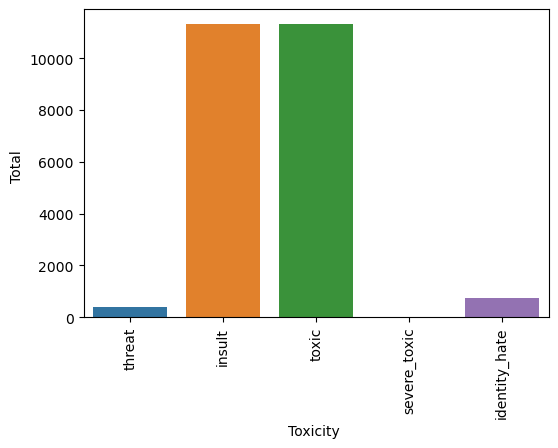

In [37]:
categories = df_train.columns.to_list()[3:8]
plt.figure(figsize=(6, 4))
print(categories)
#df_toxic = len(df_train[df_train['toxic'] == 1])
#df_nontoxic = len(df_train[df_train['toxic'] == 0])
#print(df_toxic)
#print(df_nontoxic)

ax = sns.barplot(x=categories, y=df_train.iloc[:, 3:8].sum().values)
plt.ylabel('Total ')
plt.xlabel('Toxicity ')
plt.xticks(rotation=90)
plt.show()

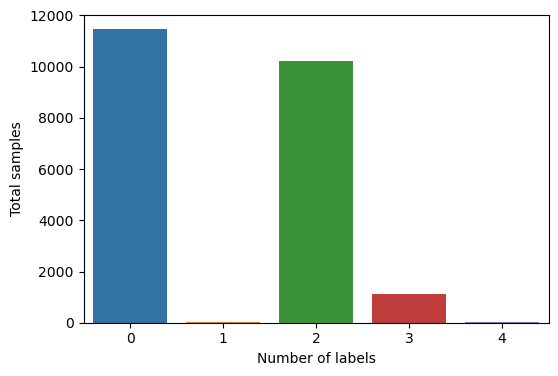

In [36]:
# no of samples having multiple labels
row_sums = df_train.iloc[:, 3:8].sum(axis=1)
multilabel_counts = row_sums.value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=multilabel_counts.index, y=multilabel_counts.values)
plt.ylabel('Total samples')
plt.xlabel('Number of labels')
plt.show()

Feed the large T5 dataset

In [ ]:
# t5_model = TFT5ForConditionalGeneration.from_pretrained('t5-large')


# SEED = 42
# MODEL_PATH = 't5-large'

# # data
# TOKENIZER = T5Tokenizer.from_pretrained(MODEL_PATH)

In [ ]:
# #print(texts)
# SRC_MAX_LENGTH = 320
# TGT_MAX_LENGTH = 20
# BATCH_SIZE = 16
# VALIDATION_SPLIT = 0.25

# # model
# FULL_FINETUNING = True
# LR = 3e-5
# OPTIMIZER = 'AdamW'
# CRITERION = 'BCEWithLogitsLoss'
# SAVE_BEST_ONLY = True
# N_VALIDATE_DUR_TRAIN = 3
# EPOCHS = 1

# #data = next(iter(train_dataset))
# #print("Example data from the dataset: \n", data)

# #t5_inputs = TOKENIZER([texts[0]], return_tensors='tf')
# #TOKENIZER.summary()
# #t5_inputs = TOKENIZER(texts, return_tensors='tf')
# src_tokenized = TOKENIZER.encode_plus(
#             texts[0], 
#           max_length=SRC_MAX_LENGTH,
#             pad_to_max_length=True,
#             truncation=True,
#             return_attention_mask=True,
#             return_token_type_ids=False,
#             return_tensors='tf'
#         )
# src_input_ids = src_tokenized['input_ids']
# src_attention_mask = src_tokenized['attention_mask']

# t5_summary_ids = t5_model.generate(src_input_ids)

In [11]:
class Config:
    def __init__(self):
        super(Config, self).__init__()

        self.SEED = 42
        self.MODEL_PATH = 't5-base'

        # data
        self.TOKENIZER = T5Tokenizer.from_pretrained(self.MODEL_PATH)
        self.SRC_MAX_LENGTH = 320
        self.TGT_MAX_LENGTH = 20
        self.BATCH_SIZE = 16
        self.VALIDATION_SPLIT = 0.25

        # model
        self.DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.FULL_FINETUNING = True
        self.LR = 3e-5
        self.OPTIMIZER = 'AdamW'
        self.CRITERION = 'BCEWithLogitsLoss'
        self.SAVE_BEST_ONLY = True
        self.N_VALIDATE_DUR_TRAIN = 3
        self.EPOCHS = 1

config = Config()

/Users/swarna/miniforge3/envs/w207_final/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [12]:
class T5Dataset(Dataset):
    def __init__(self, df, texts, labels, indices, set_type=None):
        super(T5Dataset, self).__init__()

        df = df.iloc[indices]
        self.texts = texts
        self.set_type = set_type
        if self.set_type != 'test':
            self.labels = get_labels(labels)

        self.tokenizer = config.TOKENIZER
        self.src_max_length = config.SRC_MAX_LENGTH
        self.tgt_max_length = config.TGT_MAX_LENGTH

    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, index):
        src_tokenized = self.tokenizer.encode_plus(
            self.texts[index], 
            max_length=self.src_max_length,
            pad_to_max_length=True,
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt'
        )
        src_input_ids = src_tokenized['input_ids'].squeeze()
        src_attention_mask = src_tokenized['attention_mask'].squeeze()

        if self.set_type != 'test':
            tgt_tokenized = self.tokenizer.encode_plus(
                self.labels[index], 
                max_length=self.tgt_max_length,
                pad_to_max_length=True,
                truncation=True,
                return_attention_mask=True,
                return_token_type_ids=False,
                return_tensors='pt'
            )
            tgt_input_ids = tgt_tokenized['input_ids'].squeeze()
            tgt_attention_mask = tgt_tokenized['attention_mask'].squeeze()

            return {
                'src_input_ids': src_input_ids.long(),
                'src_attention_mask': src_attention_mask.long(),
                'tgt_input_ids': tgt_input_ids.long(),
                'tgt_attention_mask': tgt_attention_mask.long()
            }

        return {
            'src_input_ids': src_input_ids.long(),
            'src_attention_mask': src_attention_mask.long()
        }

In [13]:
#print((df_train.iloc[len(train_comments)-1]))
print(len(train_comments))
train_data = T5Dataset(df_train, train_comments, train_labels, len(train_comments)-1)

val_data = T5Dataset(df_valid, valid_comments, valid_labels, len(valid_comments)-1)

train_dataloader = DataLoader(train_data, batch_size=config.BATCH_SIZE)
val_dataloader = DataLoader(val_data, batch_size=config.BATCH_SIZE)

b = next(iter(train_dataloader))
for k, v in b.items():
    print(f'{k} shape: {v.shape}')

22800
src_input_ids shape: torch.Size([16, 320])
src_attention_mask shape: torch.Size([16, 320])
tgt_input_ids shape: torch.Size([16, 20])
tgt_attention_mask shape: torch.Size([16, 20])


/Users/swarna/miniforge3/envs/w207_final/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/Users/swarna/miniforge3/envs/w207_final/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:226: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


In [30]:
class T5Model(nn.Module):
    def __init__(self):
        super(T5Model, self).__init__()

        self.t5_model = T5ForConditionalGeneration.from_pretrained(config.MODEL_PATH)

    def forward(
        self,
        input_ids, 
        attention_mask=None, 
        decoder_input_ids=None, 
        decoder_attention_mask=None, 
        labels=None
        ):

        return self.t5_model(
            input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            labels=labels,
        )


In [24]:
print(config.DEVICE)
device = config.DEVICE

cpu


In [31]:
def get_ohe(x):
    labels_li = ['_'.join(x.lower().split()) for x in df_train.columns.to_list()[3:8]]
    labels_li_indices = dict()
    for idx, label in enumerate(labels_li):
        labels_li_indices[label] = idx
        
    y = [labels.split(', ') for labels in x]
    ohe = []
    for labels in y:
        temp = [0] * 6
        for label in labels:
            idx = labels_li_indices.get(label, -1)
            if idx != -1:
                temp[idx] = 1
        ohe.append(temp)
    ohe = np.array(ohe)
    return ohe

In [32]:
def val(model, val_dataloader, criterion):
    
    val_loss = 0
    true, pred = [], []
    
    # set model.eval() every time during evaluation
    model.eval()
    
    for step, batch in enumerate(val_dataloader):
        # unpack the batch contents and push them to the device (cuda or cpu).
        b_src_input_ids = batch['src_input_ids'].to(device)
        b_src_attention_mask = batch['src_attention_mask'].to(device)
    
        b_tgt_input_ids = batch['tgt_input_ids']
        labels = b_tgt_input_ids.to(device)
        labels[labels[:, :] == config.TOKENIZER.pad_token_id] = -100

        b_tgt_attention_mask = batch['tgt_attention_mask'].to(device)

        # using torch.no_grad() during validation/inference is faster -
        # - since it does not update gradients.
        with torch.no_grad():
            # forward pass
            outputs = model(
                input_ids=b_src_input_ids, 
                attention_mask=b_src_attention_mask,
                labels=labels,
                decoder_attention_mask=b_tgt_attention_mask)
            loss = outputs[0]

            val_loss += loss.item()

            # get true 
            for true_id in b_tgt_input_ids:
                true_decoded = config.TOKENIZER.decode(true_id)
                true.append(true_decoded)

            # get pred (decoder generated textual label ids)
            pred_ids = model.t5_model.generate(
                input_ids=b_src_input_ids, 
                attention_mask=b_src_attention_mask
            )
            pred_ids = pred_ids.cpu().numpy()
            for pred_id in pred_ids:
                pred_decoded = config.TOKENIZER.decode(pred_id)
                pred.append(pred_decoded)

    true_ohe = get_ohe(true)
    pred_ohe = get_ohe(pred)

    avg_val_loss = val_loss / len(val_dataloader)
    print('Val loss:', avg_val_loss)
    print('Val accuracy:', accuracy_score(true_ohe, pred_ohe))

    val_micro_f1_score = f1_score(true_ohe, pred_ohe, average='micro')
    print('Val micro f1 score:', val_micro_f1_score)
    return val_micro_f1_score


def train(
    model,  
    train_dataloader, 
    val_dataloader, 
    criterion, 
    optimizer, 
    scheduler, 
    epoch
    ):
    
    # we validate config.N_VALIDATE_DUR_TRAIN times during the training loop
    nv = config.N_VALIDATE_DUR_TRAIN
    temp = len(train_dataloader) // nv
    temp = temp - (temp % 100)
    validate_at_steps = [temp * x for x in range(1, nv + 1)]
    
    train_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader, 
                                      desc='Epoch ' + str(epoch))):
        # set model.eval() every time during training
        model.train()
        
        # unpack the batch contents and push them to the device (cuda or cpu).
        b_src_input_ids = batch['src_input_ids'].to(device)
        b_src_attention_mask = batch['src_attention_mask'].to(device)
    
        labels = batch['tgt_input_ids'].to(device)
        labels[labels[:, :] == config.TOKENIZER.pad_token_id] = -100

        b_tgt_attention_mask = batch['tgt_attention_mask'].to(device)

        # clear accumulated gradients
        optimizer.zero_grad()

        # forward pass
        outputs = model(input_ids=b_src_input_ids, 
                        attention_mask=b_src_attention_mask,
                        labels=labels,
                        decoder_attention_mask=b_tgt_attention_mask)
        loss = outputs[0]
        train_loss += loss.item()

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()
        
        # update scheduler
        scheduler.step()

        if step in validate_at_steps:
            print(f'-- Step: {step}')
            _ = val(model, val_dataloader, criterion)
    
    avg_train_loss = train_loss / len(train_dataloader)
    print('Training loss:', avg_train_loss)

In [33]:
def run():
    # setting a seed ensures reproducible results.
    # seed may affect the performance too.
    torch.manual_seed(config.SEED)

    criterion = nn.BCEWithLogitsLoss()
    
    # define the parameters to be optmized -
    # - and add regularization
    if config.FULL_FINETUNING:
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        optimizer_parameters = [
            {
                "params": [
                    p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.001,
            },
            {
                "params": [
                    p for n, p in param_optimizer if any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.0,
            },
        ]
        optimizer = optim.AdamW(optimizer_parameters, lr=config.LR)

    num_training_steps = len(train_dataloader) * config.EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps
    )

    max_val_micro_f1_score = float('-inf')
    for epoch in range(config.EPOCHS):
        train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, epoch)
        val_micro_f1_score = val(model, val_dataloader, criterion)

        if config.SAVE_BEST_ONLY:
            if val_micro_f1_score > max_val_micro_f1_score:
                best_model = copy.deepcopy(model)
                best_val_micro_f1_score = val_micro_f1_score

                model_name = 't5_best_model'
                torch.save(best_model.state_dict(), model_name + '.pt')

                print(f'--- Best Model. Val loss: {max_val_micro_f1_score} -> {val_micro_f1_score}')
                max_val_micro_f1_score = val_micro_f1_score

    return best_model, best_val_micro_f1_score

In [34]:
model = T5Model()
model.to(device);

In [20]:
print(transformers.__version__)

4.27.1


In [35]:
best_model, best_val_micro_f1_score = run()


Epoch 0:   1%|▌                                                                                   | 10/1425 [03:21<7:56:13, 20.19s/it]


KeyboardInterrupt: 

In [38]:
test_data = T5Dataset(df_test, test_comments, test_labels, len(test_comments)-1, set_type = 'test')

test_dataloader = DataLoader(test_data, batch_size=config.BATCH_SIZE)


In [ ]:
def predict(model):
    val_loss = 0
    pred = []
    model.eval()
    for step, batch in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        b_src_input_ids = batch['src_input_ids'].to(device)
        b_src_attention_mask = batch['src_attention_mask'].to(device)

        with torch.no_grad():
            # get pred
            pred_ids = model.t5_model.generate(
                input_ids=b_src_input_ids, 
                attention_mask=b_src_attention_mask
            )
            pred_ids = pred_ids.cpu().numpy()
            for pred_id in pred_ids:
                pred_decoded = config.TOKENIZER.decode(pred_id)
                pred.append(pred_decoded)

    pred_ohe = get_ohe(pred)
    return pred_ohe

pred_ohe = predict(best_model)

In [41]:
labels_li = ['_'.join(x.lower().split()) for x in df_train.columns.to_list()[3:8]]

print(labels_li)

for idx, label in enumerate(labels_li):
    #labels_li_indices[label] = idx
    print(label)
    print(idx)

['threat', 'insult', 'toxic', 'severe_toxic', 'identity_hate']
threat
0
insult
1
toxic
2
severe_toxic
3
identity_hate
4


In [ ]:
#def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
 #   fig, ax = plt.subplots(figsize=(2.5, 2.5))
  #  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
   # for i in range(conf_matrix.shape[0]):
    #    for j in range(conf_matrix.shape[1]):
     #       ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

#    plt.xlabel('Predicted label')
 #   plt.ylabel('True label')

  #  plt.tight_layout()
   # plt.show()

In [ ]:
# grab history
#history = hist.history

# plot loss for train and validation
#ifg = plt.figure(figsize=(16, 4))
#ax = fig.add_subplot(1, 3, 1)
#plt.plot(history['loss'], lw=2, color='darkgoldenrod')
#plt.plot(history['val_loss'], lw=2, color='indianred')
#plt.legend(['Train', 'Validation'], fontsize=10)
#plt.ylim(0.5,0.7)
#ax.set_xlabel('Epochs', size=10)
#ax.set_title('Loss');

# plot accuracy for train and validation
#ax = fig.add_subplot(1, 3, 2)
#plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
#plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
#plt.legend(['Train', 'Validation'], fontsize=10)
#plt.ylim(0.7,0.8)
#ax.set_xlabel('Epochs', size=10)
#ax.set_title('Accuracy');